In [41]:
!pip install gym-minigrid==1.0.3
!pip install gym==0.22
!pip install imageio-ffmpeg==0.5.1


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.1
        self.gamma = 0.99
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]

        ################## write code ################################
        next_q_value = max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        if action == 4: action = self.act(state)
        return action

In [44]:
from utils import gen_wrapped_env, show_video

In [45]:
env = gen_wrapped_env('MiniGrid-DoorKey-8x8-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(6, agent_position)

## For Q-Learning
+ Q-learning update

In [46]:
a = 10
a/=11
print(a)

0.9090909090909091


In [ ]:
rewards = []
for ep in range(10000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}, learning rate: {}".format(ep+1, ep_rewards, agent.alpha))
        agent.alpha *= 0.995
env.close()

episode: 20, rewards: 0, learning rate: 0.1
episode: 40, rewards: 0, learning rate: 0.0995
episode: 60, rewards: 0, learning rate: 0.09900250000000001
episode: 80, rewards: 0, learning rate: 0.0985074875
episode: 100, rewards: 0, learning rate: 0.09801495006250001
episode: 120, rewards: 0, learning rate: 0.09752487531218751
episode: 140, rewards: 0, learning rate: 0.09703725093562657
episode: 160, rewards: 0, learning rate: 0.09655206468094843
episode: 180, rewards: 0, learning rate: 0.09606930435754368
episode: 200, rewards: 0, learning rate: 0.09558895783575597
episode: 220, rewards: 0, learning rate: 0.09511101304657718
episode: 240, rewards: 0, learning rate: 0.09463545798134429
episode: 260, rewards: 0, learning rate: 0.09416228069143756
episode: 280, rewards: 0, learning rate: 0.09369146928798038
episode: 300, rewards: 0, learning rate: 0.09322301194154048
episode: 320, rewards: 0, learning rate: 0.09275689688183278
episode: 340, rewards: 0, learning rate: 0.09229311239742362
epi

In [36]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 5: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [37]:
show_video()

In [38]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning_doorkey.csv')

In [39]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_doorkey.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning_doorkey.csv', index_col=False).iloc[:, 1]

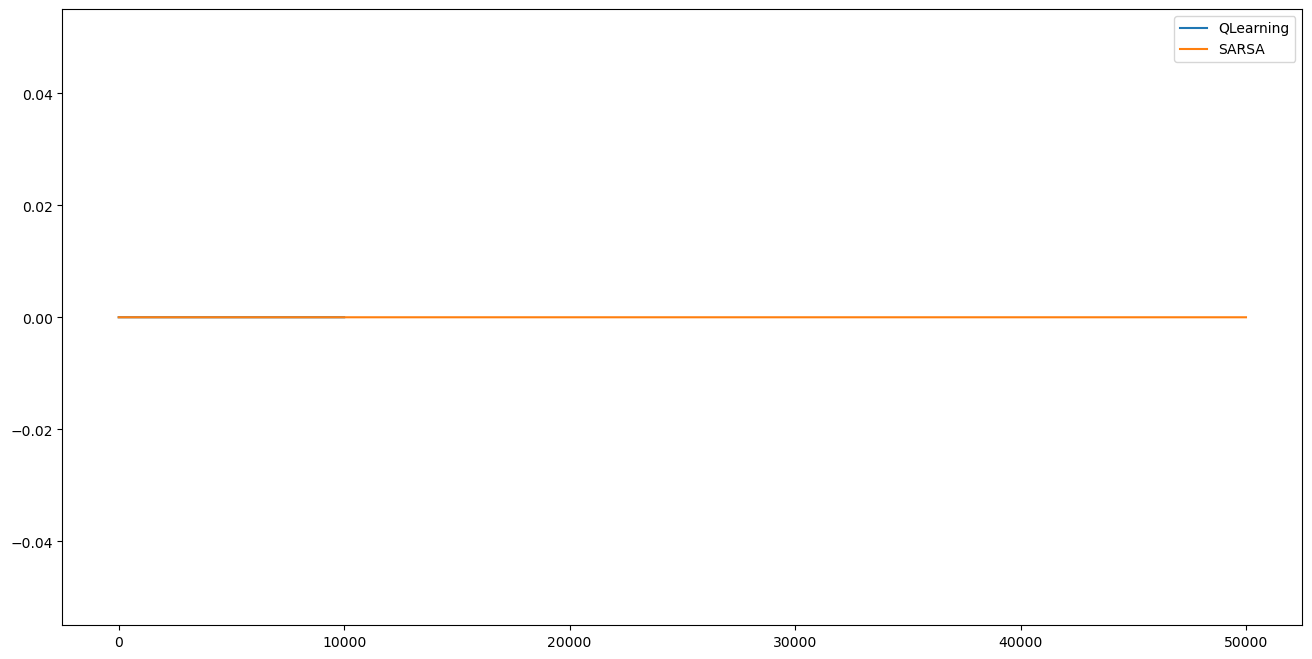

In [40]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()